In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4244,4245,15684908,Davidson,540,Germany,Male,64,1,91869.69,1,0,1,95421.00,0
1709,1710,15713843,Kao,850,Spain,Male,30,2,0.00,2,0,1,27937.12,0
6264,6265,15708610,Costa,690,Germany,Male,44,9,100368.63,2,0,0,35342.33,0
4103,4104,15693337,Perry,683,Spain,Male,41,0,148863.17,1,1,1,163911.32,0
8622,8623,15747772,Cunningham,706,Germany,Male,36,9,58571.18,2,1,0,40774.01,0


In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#GET RID OF USELESS COLUmNS
df.drop('Surname',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)

In [12]:
df.IsActiveMember.values
df[df.IsActiveMember==0]

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
10,11,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9998,9999,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df.shape

(10000, 12)

In [14]:
#deletes all the rows with space
df[df.IsActiveMember!=0].shape


(5151, 12)

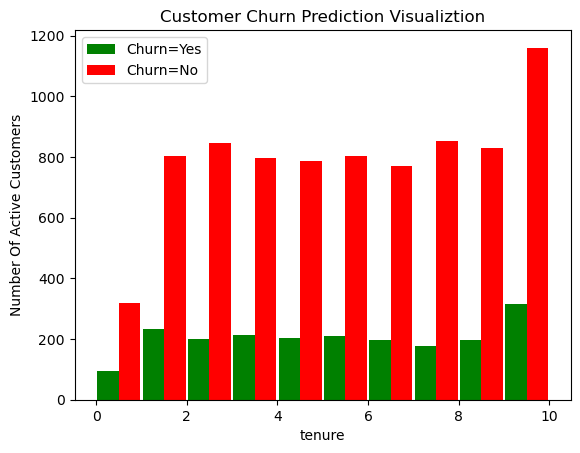

In [23]:
#loyal
tenure_churn_no = df[df.Exited==0].Tenure
#leavers
tenure_churn_yes = df[df.Exited==1].Tenure
#some data visualisation for you guys
plt.xlabel("tenure")
plt.ylabel("Number Of Active Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

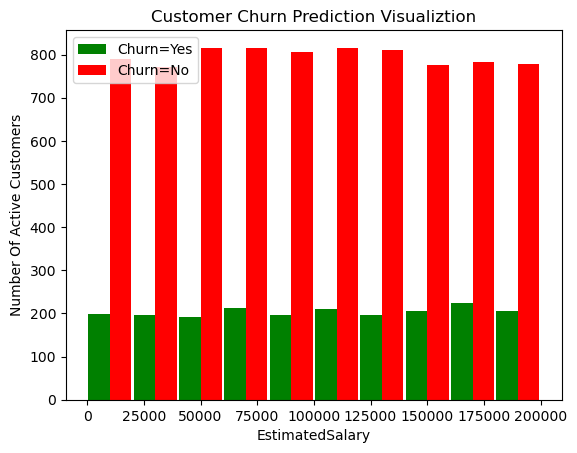

In [26]:
#loyal
tenure_churn_no = df[df.Exited==0].EstimatedSalary
#leavers
tenure_churn_yes = df[df.Exited==1].EstimatedSalary
#some data visualisation for you guys
plt.xlabel("EstimatedSalary")
plt.ylabel("Number Of Active Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [28]:
#tells me unique columns
for column in df:
    print(f'{column}:{df[column].unique()}')

RowNumber:[    1     2     3 ...  9998  9999 10000]
CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640

In [29]:
def print_unique_col_values(df):
    #for loop in every column
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [31]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [32]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [34]:
#Ml mdels need yes and no to be 1&0
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [35]:
df1.sample(5)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7180,7181,794,0,30,8,0.00,2,1,1,24113.91,0,1,0,0
4336,4337,580,0,38,9,115442.19,2,1,0,128481.50,1,0,1,0
5770,5771,631,0,51,8,100654.80,1,1,0,171587.90,0,1,0,0
5365,5366,539,0,39,2,0.00,2,1,1,48189.94,0,0,0,1
9421,9422,613,0,34,5,144094.20,1,1,0,44510.26,0,1,0,0


In [36]:
df1.dtypes

RowNumber              int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [37]:
#since not 0 and 1 we need to scale them
cols_to_scale = ['Tenure','Balance','Age','EstimatedSalary','CreditScore','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [38]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536

In [40]:
#pick x and y
X = df1.drop('Exited',axis='columns')
y = df1['Exited']
#splits dataset
from sklearn.model_selection import train_test_split
#80 train 20 test `
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
X_test.shape

(2000, 13)

In [43]:
len(X_train.columns)

13

In [51]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    #same number of nuerons as columns, for hidden layers relu is easy to compute, but can have 20 nuerons if you want
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    #just wnat less than input, knows what the input shape, can remove this 
    keras.layers.Dense(8, activation='relu'),
    #1 and o so sigmoid 
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#layers can be played with to increase accuracy
#start with 5 epoch to get an idea
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 19.8615 - accuracy: 0.6941
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 1.3752 - accuracy: 0.7005
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2992 - accuracy: 0.7175
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2754 - accuracy: 0.7145
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.9950 - accuracy: 0.7329
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2513 - accuracy: 0.7161
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 1.2616 - accuracy: 0.7301
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 1.0719 - accuracy: 0.7240
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 1.0487 - accuracy: 0.7235
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 1.1235 - accur

250/250 [==============================] - 0s 1ms/step - loss: 0.9002 - accuracy: 0.7433
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.7549
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2048 - accuracy: 0.7321
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 1.1365 - accuracy: 0.7431
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7045 - accuracy: 0.7617
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2186 - accuracy: 0.7301
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.7634
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8721 - accuracy: 0.7498
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.7155 - accuracy: 0.7539
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8725 - accuracy: 

In [52]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 2.6987 - accuracy: 0.7985


[2.698711395263672, 0.7985000014305115]

In [53]:
#y predictor
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 2ms/step


array([[1.3369401e-09],
       [2.8507423e-02],
       [3.4330699e-06],
       [1.9425130e-04],
       [4.6547229e-05]], dtype=float32)

In [54]:
#want yp to be 1 dimensional and be 0 and 1 like sigmoid
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))
#precision 0 people who left

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.60      0.01      0.03       405

    accuracy                           0.80      2000
   macro avg       0.70      0.51      0.46      2000
weighted avg       0.76      0.80      0.71      2000



Text(95.72222222222221, 0.5, 'Truth')

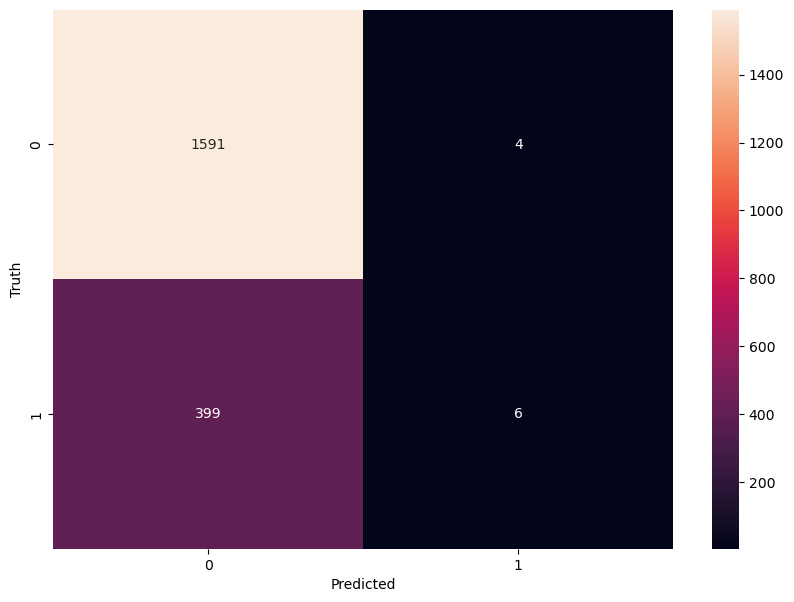

In [57]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')